In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

The goal of this exercise is to learn to fit a logistic regression on simple examples and to understand how the algorithm separates data from the different classes.

#### 1 dimension

First, we will start as usual with feature data in 1 dimension. Use `make_classification` from Scikit-learn to generate 100 data points:

```python
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)
```

_Warning: The shape of X is not the same as the shape of y. You may need (for some questions) to reshape X using: `X.reshape(1,-1)[0]`._



In [3]:
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

1. Plot the data using a scatter plot. The x-axis contains the feature and the y-axis contains the target.

The plot should look like this:

![ex3q1](./w2_day2_ex3_q1.png)

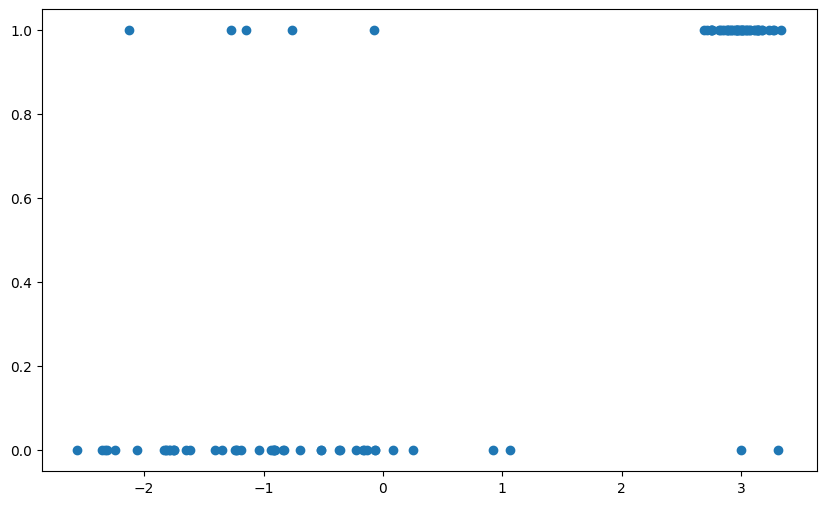

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X.reshape(1,-1)[0], y)
plt.show()

2. Fit a Logistic Regression on the generated data using scikit-learn. Print the coefficients and the interception of the Logistic Regression.

In [5]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)
print(clf.coef_[0][0])
print(clf.intercept_[0])

1.1888576492596898
-0.9849751641324811


3. Add to the previous plot the fitted sigmoid and the 0.5 probability line. The plot should look like this:

![ex3q3](./w2_day2_ex3_q3.png)

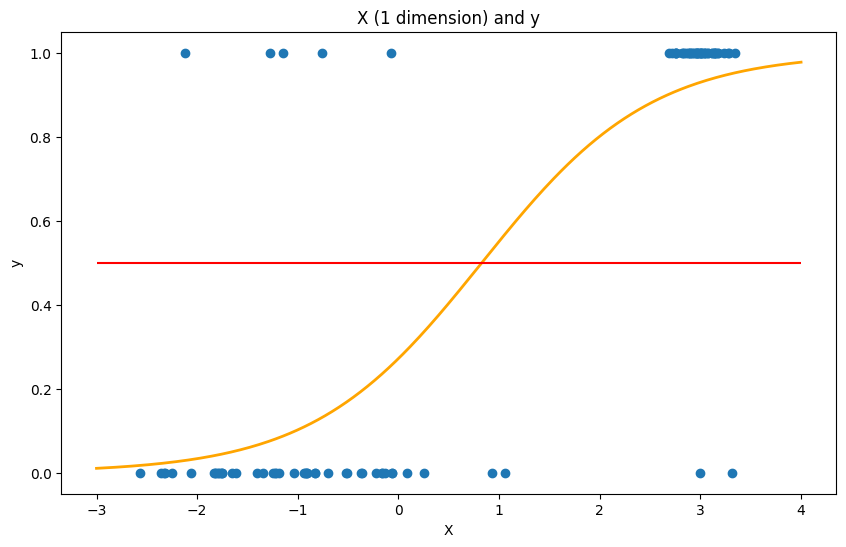

In [6]:
X_reshaped = X.reshape(1, -1)[0]


X_range = np.linspace(-3, 4, 300).reshape(-1, 1)

y_curve = clf.predict_proba(X_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_reshaped, y, label='Data Points') # The dots
plt.plot(X_range, y_curve, color='orange', linewidth=2, label='Logistic Curve') # The curve
plt.hlines(0.5, -3, 4, colors='red', linestyles='solid')

plt.title('X (1 dimension) and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

4.  Create a function `predict_probability` that takes as input the data point and the coefficients and that returns the predicted probability. As a reminder, the probability is given by: `p(x) = 1/(1+ exp(-(coef*x + intercept)))`. Check you have the same results as the method `predict_proba` from Scikit-learn.

```python
def predict_probability(coefs, X):
    '''
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set

    Returns probability of X
    '''
    #TODO
    probabilities =

    return probabilities
```

In [7]:
def predict_probability(coefs, X):
    '''
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set

    Returns probability of X
    '''
    x = X.reshape(1, -1)[0]
    coef = coefs[0]
    intercept = coefs[1]
    probabilities = 1/(1+ np.exp(-(coef*x + intercept)))
    return probabilities

print(predict_probability([clf.coef_[0][0], clf.intercept_[0]], X_reshaped ))
print(clf.predict_proba(X)[:, 1])

[0.16838474 0.93807876 0.08040988 0.92079705 0.93517695 0.92542964
 0.07566453 0.11193493 0.93416244 0.94218311 0.04063894 0.02214545
 0.05202329 0.25510271 0.12286272 0.93027359 0.02517961 0.92707346
 0.0312956  0.02897047 0.90875137 0.29277309 0.09833247 0.92920468
 0.91783715 0.90722947 0.92417198 0.93999672 0.92029472 0.08331908
 0.56895221 0.93337342 0.04402258 0.11276155 0.04116346 0.95029273
 0.07955469 0.25650192 0.94858732 0.11066692 0.90148452 0.04260248
 0.04457467 0.24263185 0.19539723 0.01742228 0.93537641 0.91514707
 0.04974125 0.93090669 0.23603023 0.93929666 0.92153866 0.22201448
 0.13171292 0.19406611 0.9272866  0.93231585 0.33509966 0.93928925
 0.93038929 0.91437456 0.06540209 0.02287954 0.90792215 0.93034525
 0.91601928 0.94808278 0.92258336 0.07860096 0.14011    0.92638263
 0.92289266 0.11222916 0.92792544 0.94565532 0.06993591 0.04272955
 0.10882585 0.12172587 0.93262529 0.9083884  0.04462804 0.94015884
 0.52916822 0.91986141 0.95193395 0.9378138  0.02326062 0.9039

5. Create a function `predict_class` that takes as input the data point and the coefficients and that returns the predicted class. Check you have the same results as the class method `predict` output on the same data.


In [10]:
def predict_class(coefs, X):
    '''
    coefs: [slope, intercept]
    X: features set
    
    Returns: numpy array of 0s and 1s
    '''
    probs = predict_probability(coefs, X)
    return (probs >= 0.5).astype(int)

params = [clf.coef_[0][0], clf.intercept_[0]]

# 4. Compare results
manual_preds = predict_class(params, X_reshaped)
sklearn_preds = clf.predict(X.reshape(-1, 1))

# Check for equality
print(f"Manual predictions: {manual_preds[:]}")
print(f"Sklearn predictions: {sklearn_preds[:]}")
print(f"Are they identical? {np.array_equal(manual_preds, sklearn_preds)}")

Manual predictions: [0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1]
Sklearn predictions: [0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1]
Are they identical? True


6. On the plot add the predicted class. The plot should look like this (the predicted class is shifted a bit to make the plot more understandable, but obviously the predicted class is 0 or 1, not 0.1 or 0.9)
   The plot should look like this:

![ex3q6](./w2_day2_ex3_q5.png)

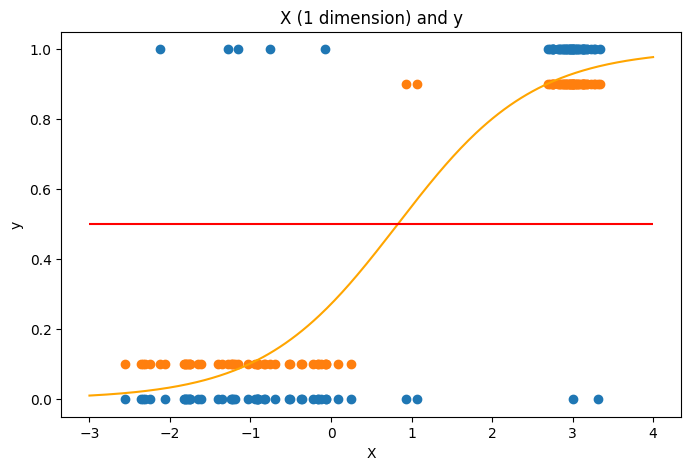

In [12]:
X_reshaped = X.reshape(-1) # A cleaner way to flatten than X.reshape(1, -1)[0]
X_range = np.linspace(-3, 4, 300).reshape(-1, 1)


shifted_preds = np.where(sklearn_preds == 0, 0.1, 0.9)

plt.figure(figsize=(8, 5))

plt.scatter(X_reshaped, y, c='tab:blue')

plt.scatter(X_reshaped, shifted_preds, c='tab:orange')

plt.plot(X_range, y_curve, color='orange', linewidth=1.5)

# Plot the Decision Threshold (Red line at y=0.5)
plt.hlines(0.5, -3, 4, colors='red', linestyles='solid')

# 4. Formatting to match the image
plt.title('X (1 dimension) and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### 2 dimensions

Now, let us repeat this process on 2-dimensional data. The goal is to focus on the decision boundary and to understand how the Logistic Regression creates a line that separates the data. The code to plot the decision boundary is provided, however it is important to understand the way it works.

- Generate 500 data points using:

```python
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)
```


In [13]:
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)

7. Fit the Logistic Regression on X and y and use the code below to plot the fitted sigmoid on the data set.

The plot should look like this:

![ex3q7](./w2_day2_ex3_q6.png)

```python
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#if needed change the line below
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

```

The plot should look like this:

- [Plot](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression)

Text(0.5, 1.0, 'Logistic regression decision boundery')

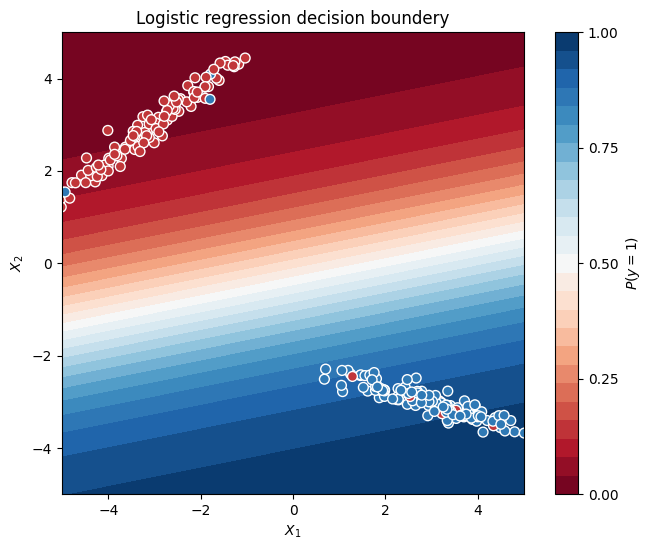

In [16]:
clf.fit(X, y)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#if needed change the line below
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
ax.set_title('Logistic regression decision boundery')